# Decision Boundary using TensorFlow

### Building a Perceptron Model

The three elements of the machine learning model are
- Experience/Data/Input: a collection of labeled data points representing two measured parameters of flowers:  petal width and stem height. 
- Task: train the model to classify a flower either as an "iris" or a "rose" 
- Performance/Cost function: Minimize the mean squared error of flowers that are incorrectly classified

We are going to use a common ML library, TensorFlow, to implement the model from the previous exercise.
We can choose learning rate, numberof epochs, activation function, and optimizer

We'll use a sigmoid activation function, and use the basic SGD optimizer. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
# Note that different model APIs are loaded through tensorflow.keras.models (Sequential is an easy one to use)
# We load different layers from tensorflow.keras.layers (easy enough right?)

We define options and load data as we did before

In [ ]:
# Options
epochs = 500
batch_size = 4
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/HelioAnalytics/EPSCOR_Hackweek/main/Course%20Materials/flowers.csv',header=None,index_col=None).values
x = data[:,:2]
y = data[:,2]

Now we will define the model. First we define the variable `model` as `Sequential()`. Therefore, operations to `model` will be tied to this. We add an input layer and a dense (fully connected) layer to `model`. TensorFlow now knows (due to the Sequential API) that it goes Input then Dense. We also compile the model telling it what the loss function is (`mse` = mean squared error) and how the weights will be updated - through the optimizer (`sgd` = standard gradient descent).

In [ ]:
model = Sequential()
model.add(Input(shape=(x.shape[1])))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='mse',optimizer='sgd')

Calling `model.fit` will train the model for a given number of epochs and with a specified batch size. There are more parameters to choose (see https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit). `verbose=0` means it won't show anything while it trains. You can see the training process if you change `verbose` to 1 (full output) or 2 (output after each epoch).

In [ ]:
model.fit(x,y,epochs=epochs,batch_size=batch_size,verbose=0)

Here we are just plotting the data and discrimination line as we did before. NOTE: we change how the model is used in the `plot_line` function. Look for the `model.predict` call.

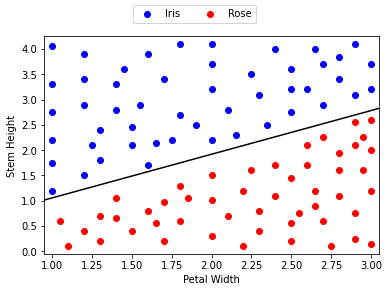

In [ ]:
# Plotting function
def plot_line(ax,model):
    # first, traverse up left edge of plot and find where model predicts blue
    y_test = np.linspace(0,4,100)
    cL = 0
    while model.predict(np.array([[0.9,y_test[cL]]])) > 0.5 and cL < len(y_test)-1:
        cL += 1
    # next, traverse up right edge of plot and find where model predicts blue
    cR = 0
    while model.predict(np.array([[3.1,y_test[cR]]])) > 0.5 and cR < len(y_test)-1:
        cR += 1
    # plot line that goes through the boundary discrimination points
    line1, = ax.plot([0.9,3.1],[y_test[cL],y_test[cR]],color='black')
    return line1 # return line object, so we can delete it before plotting another line
# Plot data and results
fig,ax=plt.subplots()
ax.scatter(data[data[:,2]==0,0],data[data[:,2]==0,1],color='blue',label='Iris')
ax.scatter(data[data[:,2]==1,0],data[data[:,2]==1,1],color='red',label='Rose')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Stem Height')
ax.set_xlim([0.95,3.05])
ax.set_ylim([-0.05,4.25])
fig.legend(ncol=2,loc='upper center')
line1 = plot_line(ax,model)

## Exploration

- What happens if the separation between the datasets isn't so clear?  
- How would you approach this problem if the boundary wasn't a straight line?
- Do the hyperparameters for batch size, number of epochs, and learning rates have more impact on the speed or the accuracy of the model? 